In [1]:
import sys
sys.path.append('../')

import numpy as np
from cpat import Compatibility, init_cpat, train_cpat
from bproj import BaryProj, init_bproj, train_bproj
from score import init_score, train_score
from scones import SCONES
import matplotlib.pyplot as plt
from score import Score
from config import Config
from datasets import Gaussian, SwissRoll
import json
import torch
import sys
import os
from sinkhorn import sample_stats, sq_bw_distance, sinkhorn, bw_uvp
from collections import defaultdict
'''
Given a configuration, train SCONES and BP and output
'''
# 2moon circle swiss-roll gaussian
from datasets import *

def resolve_dataset(D):
    if(D == "2moon"):
        return TwoMoons(noise=0.1)
    if(D == "circle"):
        return Circle(noise=0.1)
    if(D == "swiss-roll"):
        return SwissRoll(noise=0.25)
    if(D == "gaussian"):
        return Gaussian(mean=np.array([0, 0]), cov=np.eye(2))

cnf = Config("Swiss-Roll",
             source="circle",
             target="swiss-roll",
             l = 2,
             score_lr=0.000001,
             score_iters=1000,
             score_bs=500,
             score_noise_init=3,
             score_noise_final=0.01,
             scones_iters=1000,
             scones_bs=1000,
             device='cuda',
             score_n_classes = 10,
             score_steps_per_class = 300,
             score_sampling_lr = 0.00001,
             scones_samples_per_source=100,
             seed=2039)

In [3]:
bs = cnf.cpat_bs
lr = cnf.cpat_lr
iters = cnf.cpat_iters

source_dist = cnf.source_dist
target_dist = cnf.target_dist

source_sample = torch.FloatTensor(source_dist.rvs(size=(bs,)))
target_sample = torch.FloatTensor(target_dist.rvs(size=(bs,)))

In [4]:
target_sample.shape

torch.Size([500, 2])

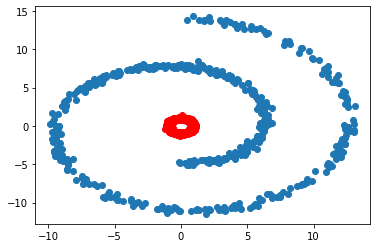

In [5]:
plt.scatter(target_sample[:,0], target_sample[:,1])
plt.scatter(source_sample[:,0], source_sample[:,1], c='red')
plt.show()